## Brent Oil Prices Forecast

- Context
  - The crude oil price movements are subject to diverse influencing factors. This dataset was retrieved from the   U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel)

- Content
  - The aim of this dataset and work is to predict future Crude Oil Prices based on the historical data available in the dataset.
  - The data contains daily Brent oil prices from 17th of May 1987 until the 30th of September 2019.

- Acknowledgements
  - Dataset is available on U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel) which is updated on weekly bases.



In [1]:
print(format("Brent Oil Prices Forecast","*^82"))

****************************Brent Oil Prices Forecast*****************************


In [2]:
# Forecast Brent Oil PriceContext
# import all neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


# for warning message

import warnings
warnings.filterwarnings("ignore")


# import user built functions

import oilpriceFunctions
%load_ext autoreload
%autoreload 2

#iterpool

import itertools

# graph acf and pacf 

import statsmodels.api as sm

In [3]:
# import data 

df_original = pd.read_csv("data/BrentOilPrices.csv")

In [4]:
# copy from original dataset

df = df_original.copy()
print(df.shape)
df.head()

(8216, 2)


,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [5]:
# info about data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null object
Price    8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [6]:
# change object dtatype to date object

df['Date'] = pd.to_datetime(df.Date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null datetime64[ns]
Price    8216 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.5 KB


In [7]:
# reset index as Date 

df.set_index('Date',inplace = True)

df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


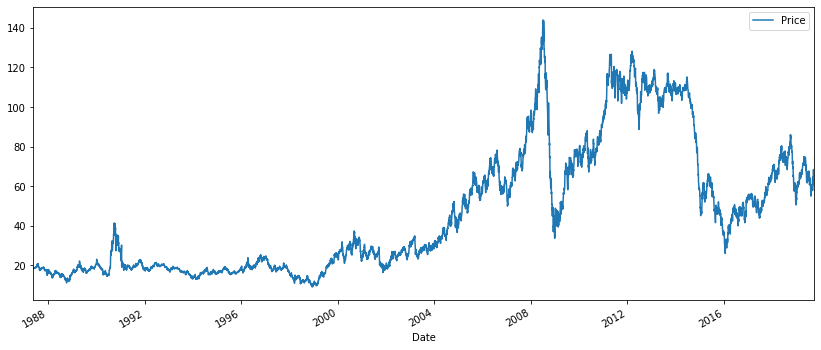

In [8]:
# plot data set

df.plot(figsize = (14,6))

In [13]:
# Taking resample monthly with sum
df_resample = df.resample('M').sum()
df_resample.head()

,Price
Date,
1987-05-31,148.64
1987-06-30,396.07
1987-07-31,456.70
1987-08-31,398.57
1987-09-30,402.89


In [14]:
# checking rolling function on data frame 

df.rolling(window=12).std()


,Price
Date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
...,...
2019-09-24,1.982202
2019-09-25,2.047958
2019-09-26,2.112893


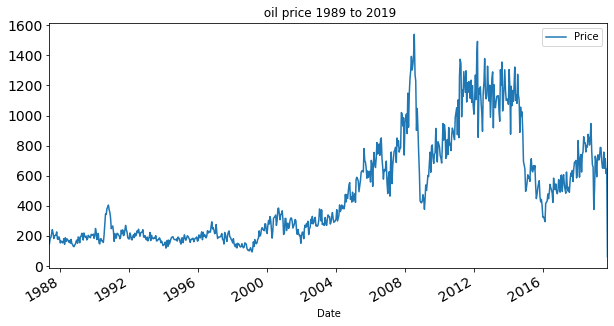

In [11]:
#plot resample time series data 
df_resample.plot(figsize = (10,5) , title = " oil price 1989 to 2019" ,fontsize = 14)

<Figure size 432x288 with 0 Axes>

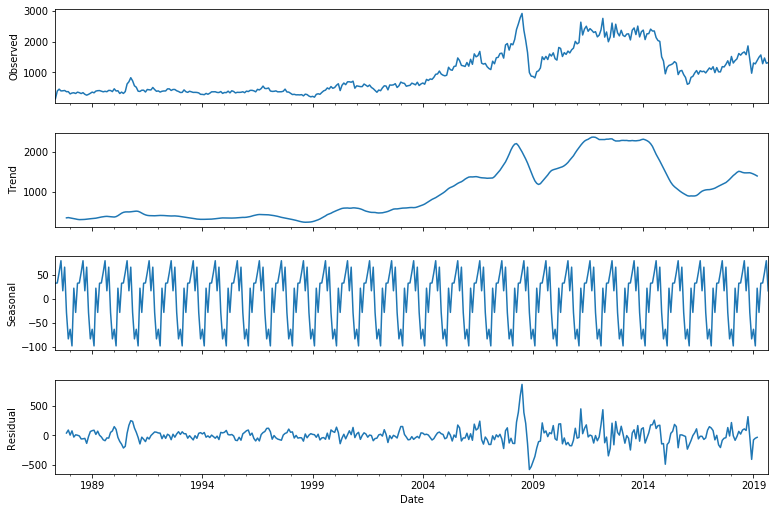

In [15]:
# Decompose to find trend,seasonality,redsidual and observed 

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_resample,freq=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)

In [16]:
# checking resample with Quater and sum method
df.resample('Q').sum()

,Price
Date,
1987-06-30,544.71
1987-09-30,1258.16
1987-12-31,1161.26
1988-03-31,970.63
1988-06-30,1016.18
...,...
2018-09-30,4879.56
2018-12-31,4263.36
2019-03-31,3975.13


Statistic Test :  -6.275972280554575
p-value :  3.899923089813694e-08
# n_lags :  12
No of observation:  375
 critical value 1% : -3.447909006729481
 critical value 5% : -2.8692783343881483
 critical value 10% : -2.5708923751111112


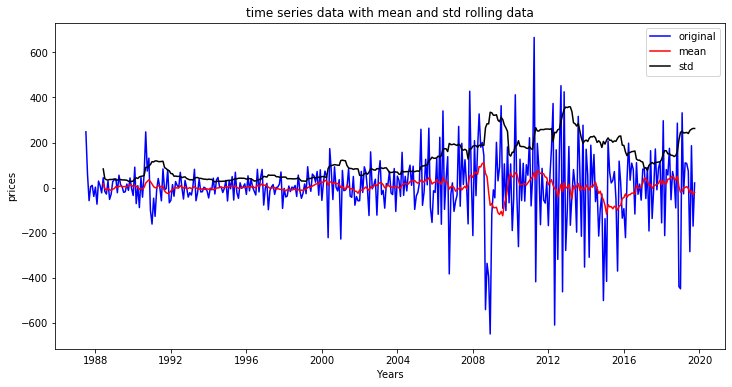

In [21]:
# first difference

df_resample['first_diffprice'] = df_resample['Price'].diff()
df_resample.dropna(inplace =True)
oilpriceFunctions.adfuller_test(df_resample['first_diffprice'],12)

In [22]:
df_resample.head()

,Price,first_diffprice
Date,,
1987-06-30,396.07,247.43
1987-07-31,456.70,60.63
1987-08-31,398.57,-58.13
1987-09-30,402.89,4.32
1987-10-31,412.67,9.78


Text(0.5, 1.0, 'Graph for check non-stationary')

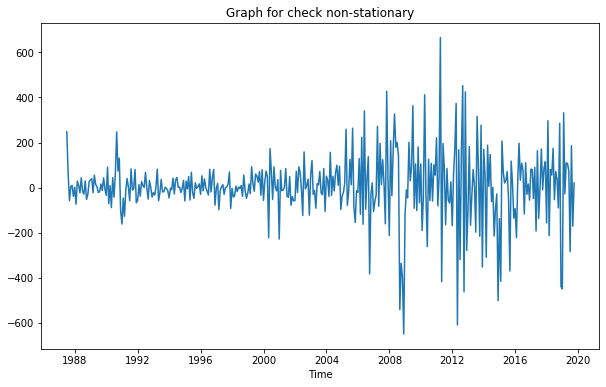

In [25]:
# check non-stationary time series data by ploting
plt.figure(figsize=(10,6))
plt.plot(df_resample['first_diffprice'])
plt.xlabel("Time")
plt.title("Graph for check non-stationary")

## Result
- Above from two adfuller test and plot, There are statistic test is less than critical value and p-values less than significant value(0.05). So time series datas are non-stationary. 

Statistic Test :  -8.06657446507755
p-value :  1.590372941827738e-12
# n_lags :  17
No of observation:  369
 critical value 1% : -3.448196541708585
 critical value 5% : -2.869404683789669
 critical value 10% : -2.5709597356805545


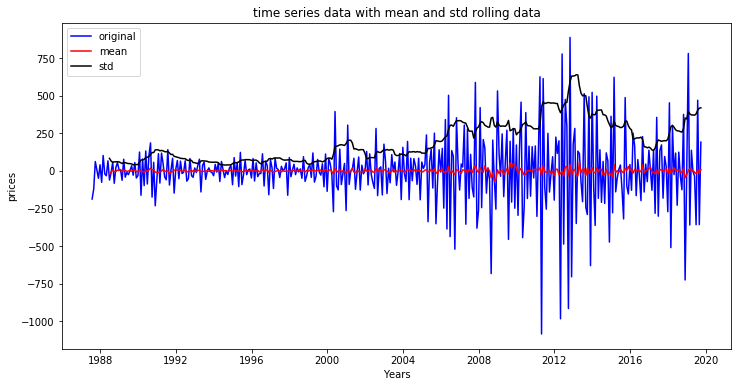

In [26]:
# second difference for becoming non-stationary time series data 

df_resample['second_diff'] = df_resample['first_diffprice'].diff()
df_resample.dropna(inplace = True)
oilpriceFunctions.adfuller_test(df_resample['second_diff'],12)

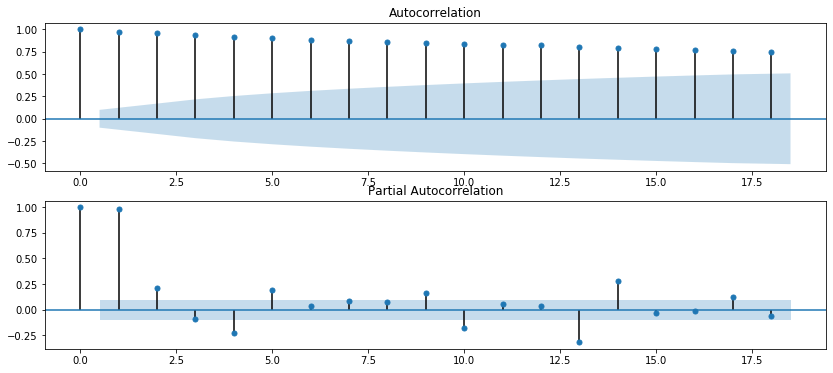

In [27]:
#plot price time series data acf and pacf 

fig ,ax = plt.subplots(nrows=2,ncols=1,figsize = (14,6))

#for acf
fig = sm.graphics.tsa.plot_acf(df_resample.Price,lags =18,ax = ax[0])

# for pacf

fig = sm.graphics.tsa.plot_pacf(df_resample.Price,lags =18,ax = ax[1])

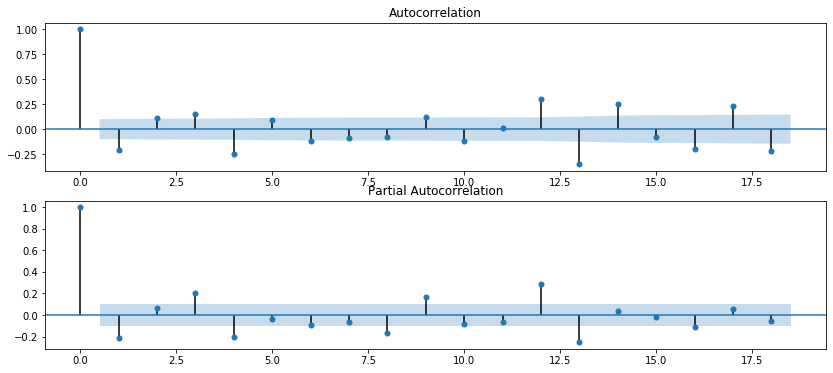

In [28]:
#plot first differentiate price time series data acf and pacf 

fig ,ax = plt.subplots(nrows=2,ncols=1,figsize = (14,6))

#for acf
fig = sm.graphics.tsa.plot_acf(df_resample.first_diffprice,lags =18,ax = ax[0])

# for pacf

fig = sm.graphics.tsa.plot_pacf(df_resample.first_diffprice,lags =18,ax = ax[1])

In [29]:
# modeling SARIMA for df_resample data 

mod = sm.tsa.statespace.SARIMAX(df_resample.Price,order=(2,1,1),seasonal_order=(2,1,1,12),trend='n')
result =mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  387
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2374.316
Date:                            Wed, 01 Apr 2020   AIC                           4762.633
Time:                                    21:14:10   BIC                           4790.102
Sample:                                07-31-1987   HQIC                          4773.539
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2785      0.307      0.909      0.363      -0.322       0.879
ar.L2          0.1448      0.041      3.569      0.000       0.065       0.224
ma.L1         -0.3764      0.305     -1.233      0.217      -0.975       0.222
ar.S.L12       0.1975      0.047      4.185      0.000       0.105       0.290
ar.S.L24      -0.2078      0.056     -3.729      0.000      -0.317      -0.099
ma.S.L12      -0.8999      0.031    -28.607      0.000      -0.962      -0.838
sigma2       1.81e+04    797.466     22.694      0.000    1.65e+04    1.97e+04
===================================================================================
Ljung-Box (Q):                      159.06   Jarque-Bera (JB):               322.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 0, 'Years')

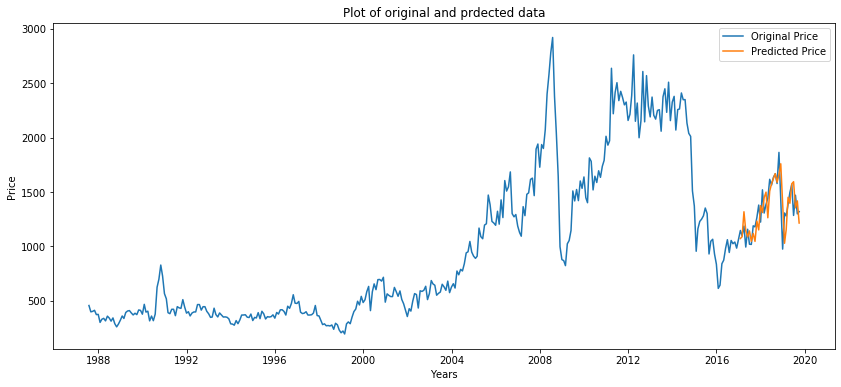

In [30]:
# Predict price
df_resample['forecast'] = result.predict(start = pd.to_datetime('2017-01-31'),dynamic=False)
plt.figure(figsize = (14,6))
plt.plot(df_resample['Price'],label = 'Original Price')
plt.plot(df_resample['forecast'],label = 'Predicted Price')
plt.legend(loc='best')

plt.title("Plot of original and prdected data")
plt.ylabel("Price")
plt.xlabel("Years")

In [31]:
df_resample[df_resample.index.year == 2017]

,Price,first_diffprice,second_diff,forecast
Date,,,,
2017-01-31,1146.11,79.94,-2.08,1072.148015
2017-02-28,1097.39,-48.72,-128.66,1088.743621
2017-03-31,1186.55,89.16,137.88,1318.376224
2017-04-30,993.85,-192.70,-281.86,1143.695763
2017-05-31,1157.51,163.66,356.36,1087.527821
2017-06-30,1020.10,-137.41,-301.07,1142.414161
2017-07-31,1018.05,-2.05,135.36,1046.290419
2017-08-31,1189.20,171.15,173.20,1118.648995
2017-09-30,1179.21,-9.99,-181.14,1045.860143


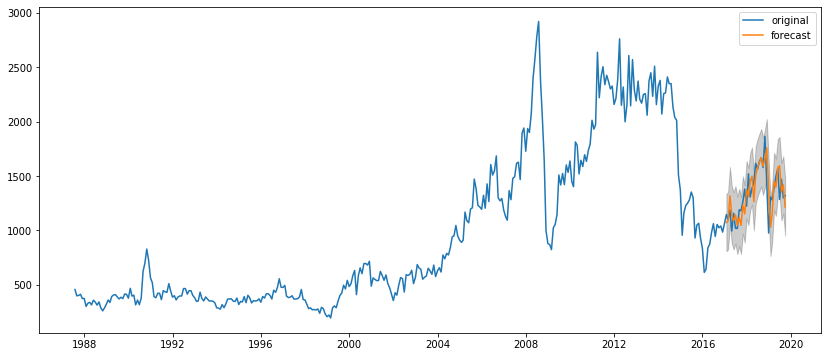

In [32]:
# Prediction 

predict1 = result.get_prediction(start = pd.to_datetime('2017-01-31') )
predict1_ci = predict1.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(predict1.predicted_mean,label = 'forecast')
plt.legend(loc='best')


plt.fill_between(predict1_ci.index,predict1_ci.iloc[:,0],predict1_ci.iloc[:,1],color = 'k',alpha = .2)
plt.show()



            lower Price  upper Price
2019-10-31  1151.985922  1679.392558
2019-11-30   805.821319  1516.113259
2019-12-31   579.676115  1470.562284
2020-01-31   541.989924  1587.676934
2020-02-29   473.866626  1659.695400
2020-03-31   576.978014  1890.053984
2020-04-30   481.247666  1911.469388
2020-05-31   495.340254  2034.370817
2020-06-30   363.660357  2004.595357
2020-07-31   376.853171  2113.873334
2020-08-31   295.763264  2123.899967
2020-09-30   198.926639  2113.889719
2020-10-31   175.108467  2223.524445
2020-11-30     2.702259  2171.308463
2020-12-31   -69.090785  2219.217595
2021-01-31  -152.731402  2250.213016
2021-02-28  -238.799669  2274.576645
2021-03-31  -120.233709  2499.315492
2021-04-30  -247.714772  2474.111041
2021-05-31  -208.465243  2612.048813
2021-06-30  -248.725851  2667.202208
2021-07-31  -282.133026  2726.217863
2021-08-31  -292.937286  2805.090213
2021-09-30  -427.558376  2757.631361
2021-10-31  -395.367687  2868.956002
2021-11-30  -556.806857  2785.317796
2

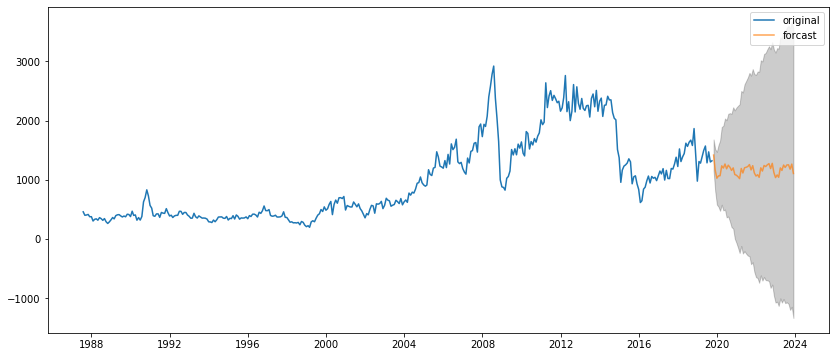

In [33]:
# Forcasting

forcast = result.get_forecast(steps = 50)
forcast_ci = forcast.conf_int()

plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(forcast.predicted_mean,label ='forcast' , alpha = .7)
plt.legend(loc='best')

plt.fill_between(forcast_ci.index,forcast_ci.iloc[:,0],forcast_ci.iloc[:,1],color ='k',alpha = .2)
plt.show

print(forcast_ci)


## optimization and tuning

In [190]:
#optimization

p=d=q=range(1,3)

pdq = list(itertools.product(p,d,q))

pdqs =[ (x[0],x[1],x[2],12) for x in pdq]

print("Print of order of AR difference MR \n")
print(pdq)

print("\nPrint of order of seasonal order \n")
print(pdqs)

Print of order of AR difference MR 

[(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)]

Print of order of seasonal order 

[(1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [214]:
# execute on list of order

ans = []
for comb in pdq:
    for combs in pdqs:
        mod = sm.tsa.statespace.SARIMAX(df.Price,
                                       order=comb,
                                       seasonal_order=combs,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        output = mod.fit()
        ans.append([comb,combs,output.aic])
        print(f" ARIMA {comb} x {combs} 12 : AIC = {output.aic}")

 ARIMA (1, 1, 1) x (1, 1, 1, 12) 12 : AIC = 24530.04821616088
 ARIMA (1, 1, 1) x (1, 1, 2, 12) 12 : AIC = 24487.13642994316
 ARIMA (1, 1, 1) x (1, 2, 1, 12) 12 : AIC = 27599.14610609439
 ARIMA (1, 1, 1) x (1, 2, 2, 12) 12 : AIC = 24653.616246532823
 ARIMA (1, 1, 1) x (2, 1, 1, 12) 12 : AIC = 24507.4444605158
 ARIMA (1, 1, 1) x (2, 1, 2, 12) 12 : AIC = 24488.98661666263
 ARIMA (1, 1, 1) x (2, 2, 1, 12) 12 : AIC = 26717.69153146232
 ARIMA (1, 1, 1) x (2, 2, 2, 12) 12 : AIC = 24744.217195791723
 ARIMA (1, 1, 2) x (1, 1, 1, 12) 12 : AIC = 24529.619720243536
 ARIMA (1, 1, 2) x (1, 1, 2, 12) 12 : AIC = 24487.01905079107
 ARIMA (1, 1, 2) x (1, 2, 1, 12) 12 : AIC = 27596.282001846488
 ARIMA (1, 1, 2) x (1, 2, 2, 12) 12 : AIC = 24659.003664032112
 ARIMA (1, 1, 2) x (2, 1, 1, 12) 12 : AIC = 24508.989951083277
 ARIMA (1, 1, 2) x (2, 1, 2, 12) 12 : AIC = 24488.280337596887
 ARIMA (1, 1, 2) x (2, 2, 1, 12) 12 : AIC = 26714.499207566834
 ARIMA (1, 1, 2) x (2, 2, 2, 12) 12 : AIC = 24783.995340446665


In [215]:
# make dataframe for find min aic 

df_ans = pd.DataFrame(ans , columns =['pdq','pdqs','aic'])
df_ans.head()

,pdq,pdqs,aic
0,"(1, 1, 1)","(1, 1, 1, 12)",24530.048216
1,"(1, 1, 1)","(1, 1, 2, 12)",24487.136430
2,"(1, 1, 1)","(1, 2, 1, 12)",27599.146106
3,"(1, 1, 1)","(1, 2, 2, 12)",24653.616247
4,"(1, 1, 1)","(2, 1, 1, 12)",24507.444461


In [216]:
# find min aic

df_ans.loc[df_ans.aic.idxmin]

pdq         (2, 1, 2)
pdqs    (1, 1, 2, 12)
aic           24486.6
Name: 41, dtype: object

In [34]:
# model fit for daily price 

output_d = sm.tsa.statespace.SARIMAX(df.Price,
                                       order=(2,1,2),
                                       seasonal_order=(1,1,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)


result_d = output_d.fit()
result_d.summary()

/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 8216
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood              -12234.590
Date:                            Wed, 01 Apr 2020   AIC                          24485.180
Time:                                    21:18:07   BIC                          24541.251
Sample:                                         0   HQIC                         24504.351
                                           - 8216                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3630      0.016    -23.400      0.000      -0.393      -0.333
ar.L2         -0.9549      0.014    -68.492      0.000      -0.982      -0.928
ma.L1          0.3752      0.016     23.737      0.000       0.344       0.406
ma.L2          0.9554      0.014     67.892      0.000       0.928       0.983
ar.S.L12      -0.9287      0.022    -42.855      0.000      -0.971      -0.886
ma.S.L12      -0.0948      0.168     -0.565      0.572      -0.423       0.234
ma.S.L24      -0.9052      0.152     -5.950      0.000      -1.203      -0.607
sigma2         1.1556      0.191      6.047      0.000       0.781       1.530
===================================================================================
Ljung-Box (Q):                      100.04   Jarque-Bera (JB):             23400.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

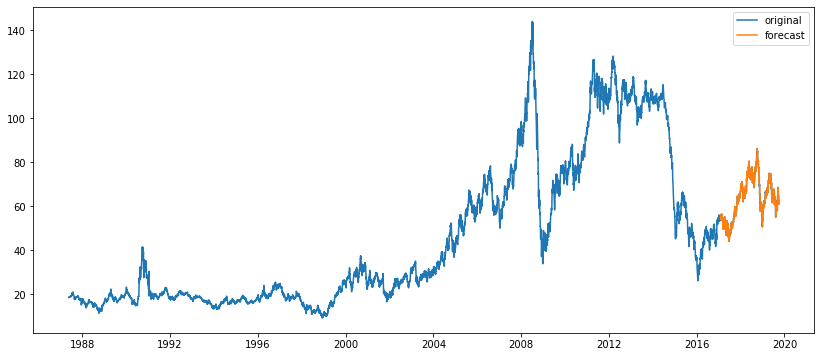

In [220]:
# Prediction with optimized orders for daily data 

predict_d = result_d.get_prediction(start = pd.to_datetime('2017-01-31') )
predict_d_ci = predict_d.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df.Price,label = 'original')
plt.plot(predict_d.predicted_mean,label = 'forecast')
plt.legend(loc='best')

In [35]:
# model fit with optimized order and seasonal order for monthly data 

output_opt = sm.tsa.statespace.SARIMAX(df_resample.Price,
                                       order=(1,1,2),
                                       seasonal_order=(2,2,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
result_opt =output_opt.fit()
result_opt.summary()

/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  387
Model:             SARIMAX(1, 1, 2)x(2, 2, 2, 12)   Log Likelihood               -2166.653
Date:                            Wed, 01 Apr 2020   AIC                           4349.307
Time:                                    21:19:00   BIC                           4379.820
Sample:                                07-31-1987   HQIC                          4361.471
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8338      0.130     -6.418      0.000      -1.088      -0.579
ma.L1          0.7634      0.135      5.636      0.000       0.498       1.029
ma.L2         -0.1249      0.038     -3.274      0.001      -0.200      -0.050
ar.S.L12       0.1947      0.078      2.482      0.013       0.041       0.349
ar.S.L24      -0.1324      0.061     -2.182      0.029      -0.251      -0.013
ma.S.L12      -1.9207      0.249     -7.728      0.000      -2.408      -1.434
ma.S.L24       0.9292      0.213      4.363      0.000       0.512       1.347
sigma2       1.98e+04   5679.129      3.486      0.000    8664.792    3.09e+04
===================================================================================
Ljung-Box (Q):                      154.21   Jarque-Bera (JB):               194.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.32   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

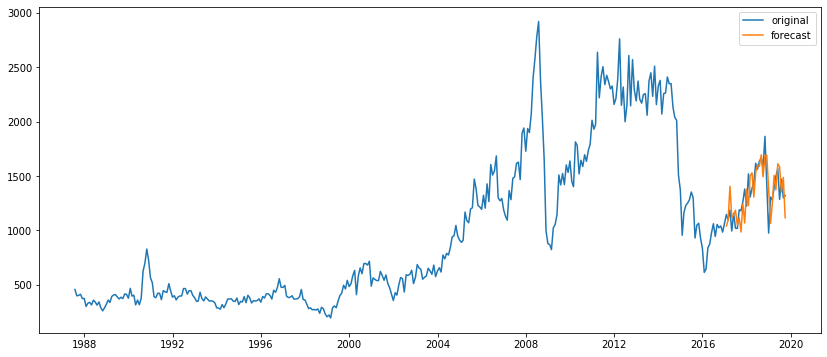

In [36]:
# Prediction with optimized orders

predict_opt = result_opt.get_prediction(start = pd.to_datetime('2017-01-31') )
predict_opt_ci = predict_opt.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(predict_opt.predicted_mean,label = 'forecast')
plt.legend(loc='best')

<function matplotlib.pyplot.show(*args, **kw)>

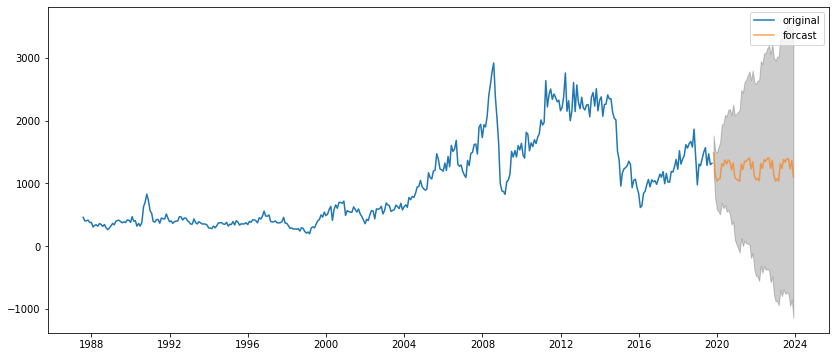

In [37]:
# Forcasting

forcast_opt = result_opt.get_forecast(steps = 50)
forcast_opt_ci = forcast_opt.conf_int()

plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(forcast_opt.predicted_mean,label ='forcast' , alpha = .7)
plt.legend(loc='best')

plt.fill_between(forcast_opt_ci.index,forcast_opt_ci.iloc[:,0],forcast_opt_ci.iloc[:,1],color ='k',alpha = .2)
plt.show

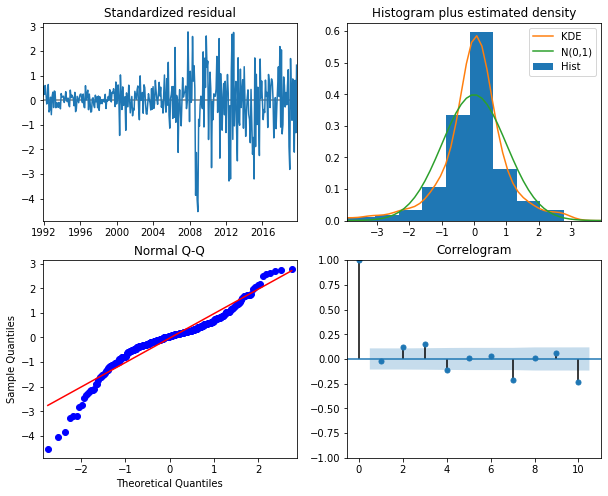

In [39]:
# Analysis result summary by graph


result_opt.plot_diagnostics(figsize=(10,8))
plt.show()
